This is my first kaggle notebook, after studying machine learning for a while now. 

Many machine learning professionnels and data scientists point me to start with the Titanic competition, so im giving it a try. 

# **Step 1**: Understand the problem

The problem that we want to solve is to **predict** who's going to survive the titanic accident based on the dataset provided to us by kaggle.


# **Step 2**: Import libraries

Now lets import some python libraries that will help us explore and understand the dataset and train the machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# **Step 3**: Pre-processing the dataset

The most important step is the **data pre-processing**. Without clean data we will not get correct result and will have errors.

**Titanic Dataset** divided into three files:
*   **train.csv** : this file will be used to train the models
*   **test.csv** : this file to test our trained models
*   **gender_submission.csv** : is the desired file or output to be submitted to kaggle.

our main focus will be on **train.csv** for now.

lets import and examine the dataset

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

In [ ]:
len(train)

891

In [ ]:
len(test)

418

We can notice that dataset divided into almost 2/3 for training and 1/3 for testing. this is a good practice to reserve a third of dataset for testing and the rest for training



What features do we have?

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have combination of strings and numbers, thats mean we have to do somthing to the strings values since machine learning want numbers to process. We have to identify categorical features to transform them to numbers.

**Do we have missing values ?**

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have missing valuse in **Age**, **Cabin** and **Embarked**

To visualize the missing valuse we can use **missingno**

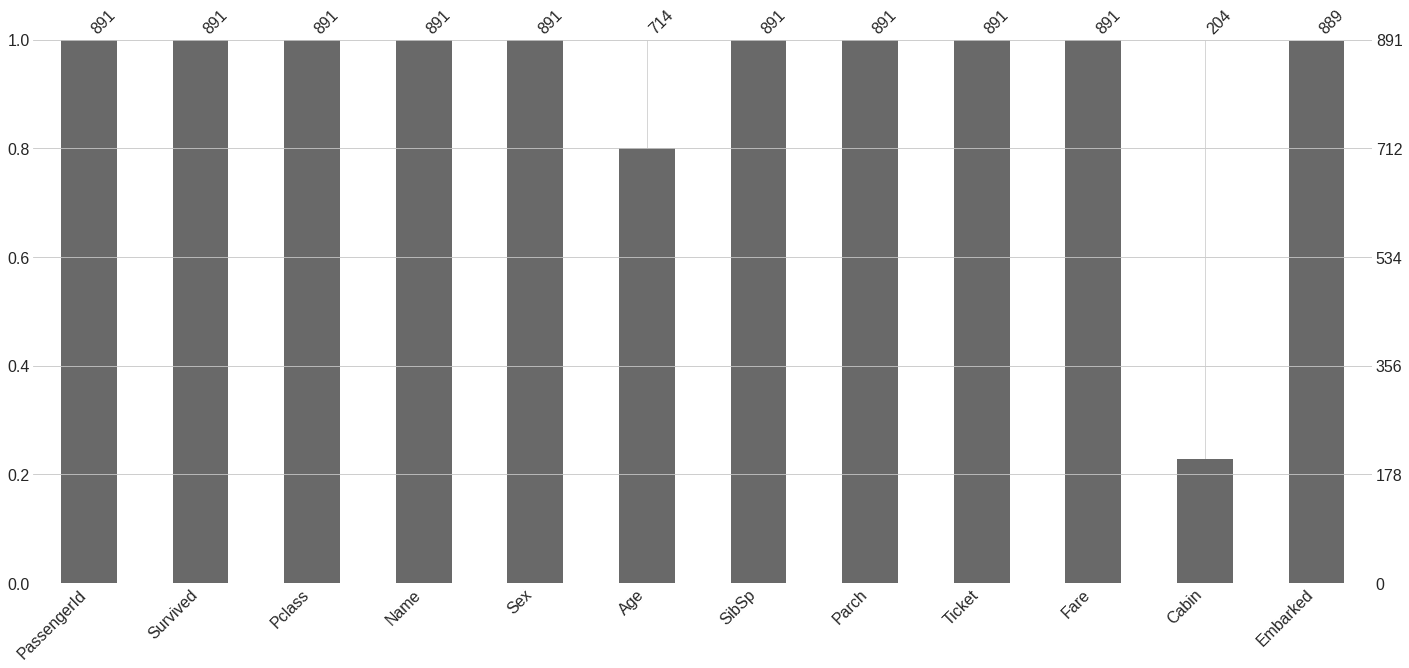

In [ ]:
missingno.bar(train)

We have to do something about the missing valuse.

For now lets process all features one by one 

First, lets create a Data Frame and add the features after processing to it as we process each one

In [ ]:
dataF = pd.DataFrame()

### **Feature**: *PassengerId*
This feature or column hold the ID of the passenger

In [ ]:
train.PassengerId.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [ ]:
train.PassengerId.nunique()

891

We can see that **PassengerId** valuse are unique, and I dont think that ID has any impact in the predection. Hence we will not add them to our dataframe and will not be used for training.

### **Feature**: *Survived*
This is the column that we want our models to predict, its either 0 = not-survived, 1 = survived

In [ ]:
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
train.Survived.nunique()

2

any missing valuse?

In [ ]:
train.Survived.isnull().sum()

0

lets add it to our dataframe

In [ ]:
dataF['Survived'] = train['Survived']
dataF

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### **Feature**: *Pclass*
This hold ticket class

In [ ]:
train.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

any missing valuse?

In [ ]:
train.Pclass.isnull().sum()

0

In [ ]:
train.Pclass.nunique()

3

this feature hold 3 valuse, 1 = 1st class, 2 = 2nd class and 3 = 3rd class

Its a categorical values so later we will encode it, lets add it to our dataframe

In [ ]:
dataF['Pclass'] = train['Pclass']
dataF

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


### **Feature**: *Name*
The name of the passenger.

In [ ]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
train.Name.isnull().sum()

0

How many unique valuse are ther?

In [ ]:
train.Name.nunique()

891

We get **891** unique names in the training dataset, so this almost the same as **Passenger ID**.

Because of that we will not add it to our dataframe or dataset

### **Feature**: *Sex*
Male or Female

In [ ]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [ ]:
train.Sex.isnull().sum()

0

In [ ]:
train.Sex.nunique()

2

so we have two valuse **male** or **female**
later we have to encode it because it's categorical data

lets add it to dataframe

In [ ]:
dataF['Sex'] = train['Sex']
dataF

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
...,...,...,...
886,0,2,male
887,1,1,female
888,0,3,female
889,1,1,male


### **Feature**: *Age*
Passenger age

In [ ]:
train.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
train.Age.isnull().sum()

177

We have 177 missing values out of 891. its a big number, if we decided to use this feature we have to fill the missing values (some use the average of valuse and add it to the missing rows), but we are not going to use it this time

### **Feature**: *SibSp*
The number of siblings passenger has 

In [ ]:
train.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [ ]:
train.SibSp.isnull().sum()

0

In [ ]:
train.SibSp.nunique()

7

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

We can notice that passengers have number of siblings from 0 to 8, so we have 7 valuse we will encode them later.

In [ ]:
dataF['SibSp'] = train['SibSp']
dataF

,Survived,Pclass,Sex,SibSp
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0
...,...,...,...,...
886,0,2,male,0
887,1,1,female,0
888,0,3,female,1
889,1,1,male,0


### **Feature**: *Parch*
The number of parents the passenger has 

In [ ]:
train.Parch.head()

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [ ]:
train.Parch.isnull().sum()

0

In [ ]:
train.Parch.nunique()

7

In [ ]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

same as SipSp we have 7 values from 0 to 6, we encode them later.

In [ ]:
dataF['Parch'] = train['Parch']
dataF

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0
...,...,...,...,...,...
886,0,2,male,0,0
887,1,1,female,0,0
888,0,3,female,1,2
889,1,1,male,0,0


In [ ]:
#fig = plt.figure(figsize=(15, 8))
#sns.countplot(x=dataF.Parch, data=dataF)

### **Feature**: *Ticket*
Ticket number

In [ ]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [ ]:
train.Ticket.isnull().sum()

0

In [ ]:
train.Ticket.nunique()

681

In [ ]:
train.Ticket.value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
3101295     6
           ..
374887      1
2003        1
350404      1
248698      1
237789      1
Name: Ticket, Length: 681, dtype: int64

because we have too many unique values, its better to not include it in training for now.

### **Feature**: *Fare*
The cost of the ticket

In [ ]:
train.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [ ]:
train.Fare.isnull().sum()

0

In [ ]:
train.Fare.nunique()

248

Too many unique values lets drop it

### **Feature**: *Cabin*
Cabin number

In [ ]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [ ]:
train.Cabin.isnull().sum()

687

Because we have too many missing values we will drop it too.

### **Feature**: *Embarked*
The Port that the titanic left from

In [ ]:
train.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [ ]:
train.Embarked.isnull().sum()

2

we have to do something to these two values

In [ ]:
train.Embarked.nunique()

3

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

so we have three values (S, C, Q), we will encode them later.

now, for the two missing values, because there are only two its better not to drop the entire column or feature, so, either we fill the two spaces or delete the two samples that miss the values.

lets just drop the two samples.

In [ ]:
dataF['Embarked'] = train['Embarked']
dataF = dataF.dropna(subset=['Embarked'])
dataF

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [ ]:
len(dataF)

889

Because we droped two samples the remaining training samples are **889**

In [ ]:
dataF.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we can see that we will not use half of the data set features because those features have missing values.

Deleting a column or feature because it has missing values considred to be bad practice if we dont have too much data, even sometimes the deleted feature is more important then the rest.

After understanding feature engineering we will come back and do something to those features.

For now lets use our dataframe to encode categorical features.

### **Feature Encoding**

Now lets encode the categorical data

In [ ]:
dataF.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


We will use One-hot Encoder

In [ ]:
dataF_embarked_encode = pd.get_dummies(dataF['Embarked'], prefix='embarked')
dataF_sex_encode = pd.get_dummies(dataF['Sex'], prefix='sex')
dataF_pclass_encode = pd.get_dummies(dataF['Pclass'], prefix='pclass')
dataF_encoded = pd.concat([dataF, dataF_embarked_encode, dataF_sex_encode, dataF_pclass_encode], axis=1)
dataF_encoded = dataF_encoded.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
dataF.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [ ]:
dataF_encoded.head()

,Survived,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,1


OK, now our dataset is ready for training

# **Step 4**: Building the machine learning models

Since our dataset now is complete and have numeric values, lets build our models

In [ ]:
dataF_encoded.head()

,Survived,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,0,0,1,0,1,0,0,1
1,1,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1
3,1,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,1


Speperate the column to be predicted (**Survived**) from the rest

In [ ]:
X_train = dataF_encoded.drop('Survived', axis=1)
y_train = dataF_encoded.Survived

In [ ]:
X_train.head()

,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,0,0,1,0,1,0,0,1
1,1,0,1,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,1,0,1,0,0,1


In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### **Logistic Regression**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_acc = round(log_reg.score(X_train, y_train) * 100, 2)
print("Accuracy: %s" % log_acc)

Accuracy: 79.19


### **Gaussian Naive Bayes**

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_acc = round(GNB.score(X_train, y_train) * 100, 2)
print("Accuracy: %s" % GNB_acc)

Accuracy: 78.4


### **Linear Support Vector Machines (LSVM)**

In [ ]:
LSVM = LinearSVC()
LSVM.fit(X_train, y_train)
LSVM_acc = round(LSVM.score(X_train, y_train) * 100, 2)
print("Accuracy: %s" % LSVM_acc)

Accuracy: 80.09


### **Decision Tree Classifier**

In [ ]:
Dec_tree = DecisionTreeClassifier()
Dec_tree.fit(X_train, y_train)
Dec_acc = round(Dec_tree.score(X_train, y_train) * 100, 2)
print("Accuracy: %s" % Dec_acc)

Accuracy: 83.69


Lets compare the four models Accuracy

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [log_acc, GNB_acc, LSVM_acc, Dec_acc]})
print("-Accuracy Scores-")
models.sort_values(by='Score', ascending=False)

-Accuracy Scores-


,Model,Score
3,Decision Tree,83.69
2,Linear SVC,80.09
0,Logistic Regression,79.19
1,Naive Bayes,78.40


As we can see **Decision Tree** has the best **accuracy**

Now that we have trained our models lets test them using the test file **test.csv**

# **Step 5**: Test the trained models

Because our **Decision Tree** model scored the best with **83.69** we will use it for the test dataset **test.csv**

First lets prepare our test dataset

In [ ]:
X_train.head()

,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,0,0,1,0,1,0,0,1
1,1,0,1,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,1,0,1,0,0,1


We want our test set to be same as **X_train**

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Lets encode the three column agin for the test dataset

In [ ]:
test_embarked_encode = pd.get_dummies(test['Embarked'], prefix='embarked')
test_sex_encode = pd.get_dummies(test['Sex'], prefix='sex')
test_pclass_encode = pd.get_dummies(test['Pclass'], prefix='pclass')
test_encoded = pd.concat([test, test_embarked_encode, test_sex_encode, test_pclass_encode], axis=1)

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [ ]:
test_encoded = test_encoded.drop(['Pclass', 'Sex', 'Embarked', 'Name',
                                  'Age', 'PassengerId','Ticket','Fare',
                                  'Cabin'], axis=1)

In [ ]:
test_encoded.head()

,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,1,0,0,0,1
2,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,1,0,1,0,0,1
4,1,1,0,0,1,1,0,0,0,1


In [ ]:
X_train.head()

,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,0,0,1,0,1,0,0,1
1,1,0,1,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,1,1,0,1,0,0
4,0,0,0,0,1,0,1,0,0,1


OK, now we have our test dataset ready for prediction.

lets use the **Dec_tree** model that we have trained

In [ ]:
pred = Dec_tree.predict(test_encoded)

In [ ]:
pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

Now we have our predictions in **pred** array

lets create a dataframe to add pred content to it and add the crosponding columns as in **gender_submission.csv**

# **Step 6**: Submit predictions

In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
result = pd.DataFrame()
result['PassengerId'] = test['PassengerId']
result['Survived'] = pred
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Perfect, now lets convert it to **CSV** file so we can submit it to **Kaggle**

In [ ]:
result.to_csv('/content/Submission.csv', index=False)

***Excellent***

finally **WE ARE DONE!**


But we have to come back later for the other features that we deleted from the dataset and enhance our models's accuracy.